# Load Dataset

In [1]:
twitch_df = pd.read_csv("twitch.csv")
twitch = twitch_df.copy()
twitch.head()

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language,Date
0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,True,False,English,2014-09-12 23:50
1,summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,True,False,English,2011-12-01 6:33
2,Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607,True,True,Portuguese,2017-11-09 14:10
3,ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,106546942,True,False,English,2012-06-11 13:36
4,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,True,False,English,2014-04-02 3:57


# Explore Dataset

In [2]:
twitch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Channel               1000 non-null   object
 1   Watch time(Minutes)   1000 non-null   int64 
 2   Stream time(minutes)  1000 non-null   int64 
 3   Peak viewers          1000 non-null   int64 
 4   Average viewers       1000 non-null   int64 
 5   Followers             1000 non-null   int64 
 6   Followers gained      1000 non-null   int64 
 7   Views gained          1000 non-null   int64 
 8   Partnered             1000 non-null   bool  
 9   Mature                1000 non-null   bool  
 10  Language              1000 non-null   object
 11  Date                  992 non-null    object
dtypes: bool(2), int64(7), object(3)
memory usage: 80.2+ KB


In [3]:
twitch['Stream time(minutes)'].max()/60/24

362.1145833333333

In [4]:
twitch['Language'].value_counts()

English       485
Korean         77
Russian        74
Spanish        68
French         66
Portuguese     61
German         49
Chinese        30
Turkish        22
Italian        17
Polish         12
Thai           11
Japanese       10
Czech           6
Arabic          5
Hungarian       2
Other           1
Swedish         1
Finnish         1
Greek           1
Slovak          1
Name: Language, dtype: int64

# Preprocessing 

In [5]:
# Categorical Variables

In [6]:
twitch['English'] = twitch['Language'] == "English"
twitch['English'] = twitch['English'].astype('int')
twitch['Partnered'] = twitch['Partnered'].astype('int')
twitch['Mature'] = twitch['Mature'].astype('int')

In [7]:
# Datetime

In [8]:
twitch['Date'] = pd.to_datetime(twitch['Date'])

In [9]:
from datetime import datetime, timedelta

time = datetime(2020, 9, 1)

twitch['Date'] = time - twitch['Date']

twitch['Date'] = list(date.days for date in twitch['Date'])

In [10]:
# Null

In [11]:
twitch['Date'][twitch['Date'].isna()] = twitch['Date'].median()

In [12]:
# Desc

In [13]:
twitch['Desc'] = "original"

# EDA

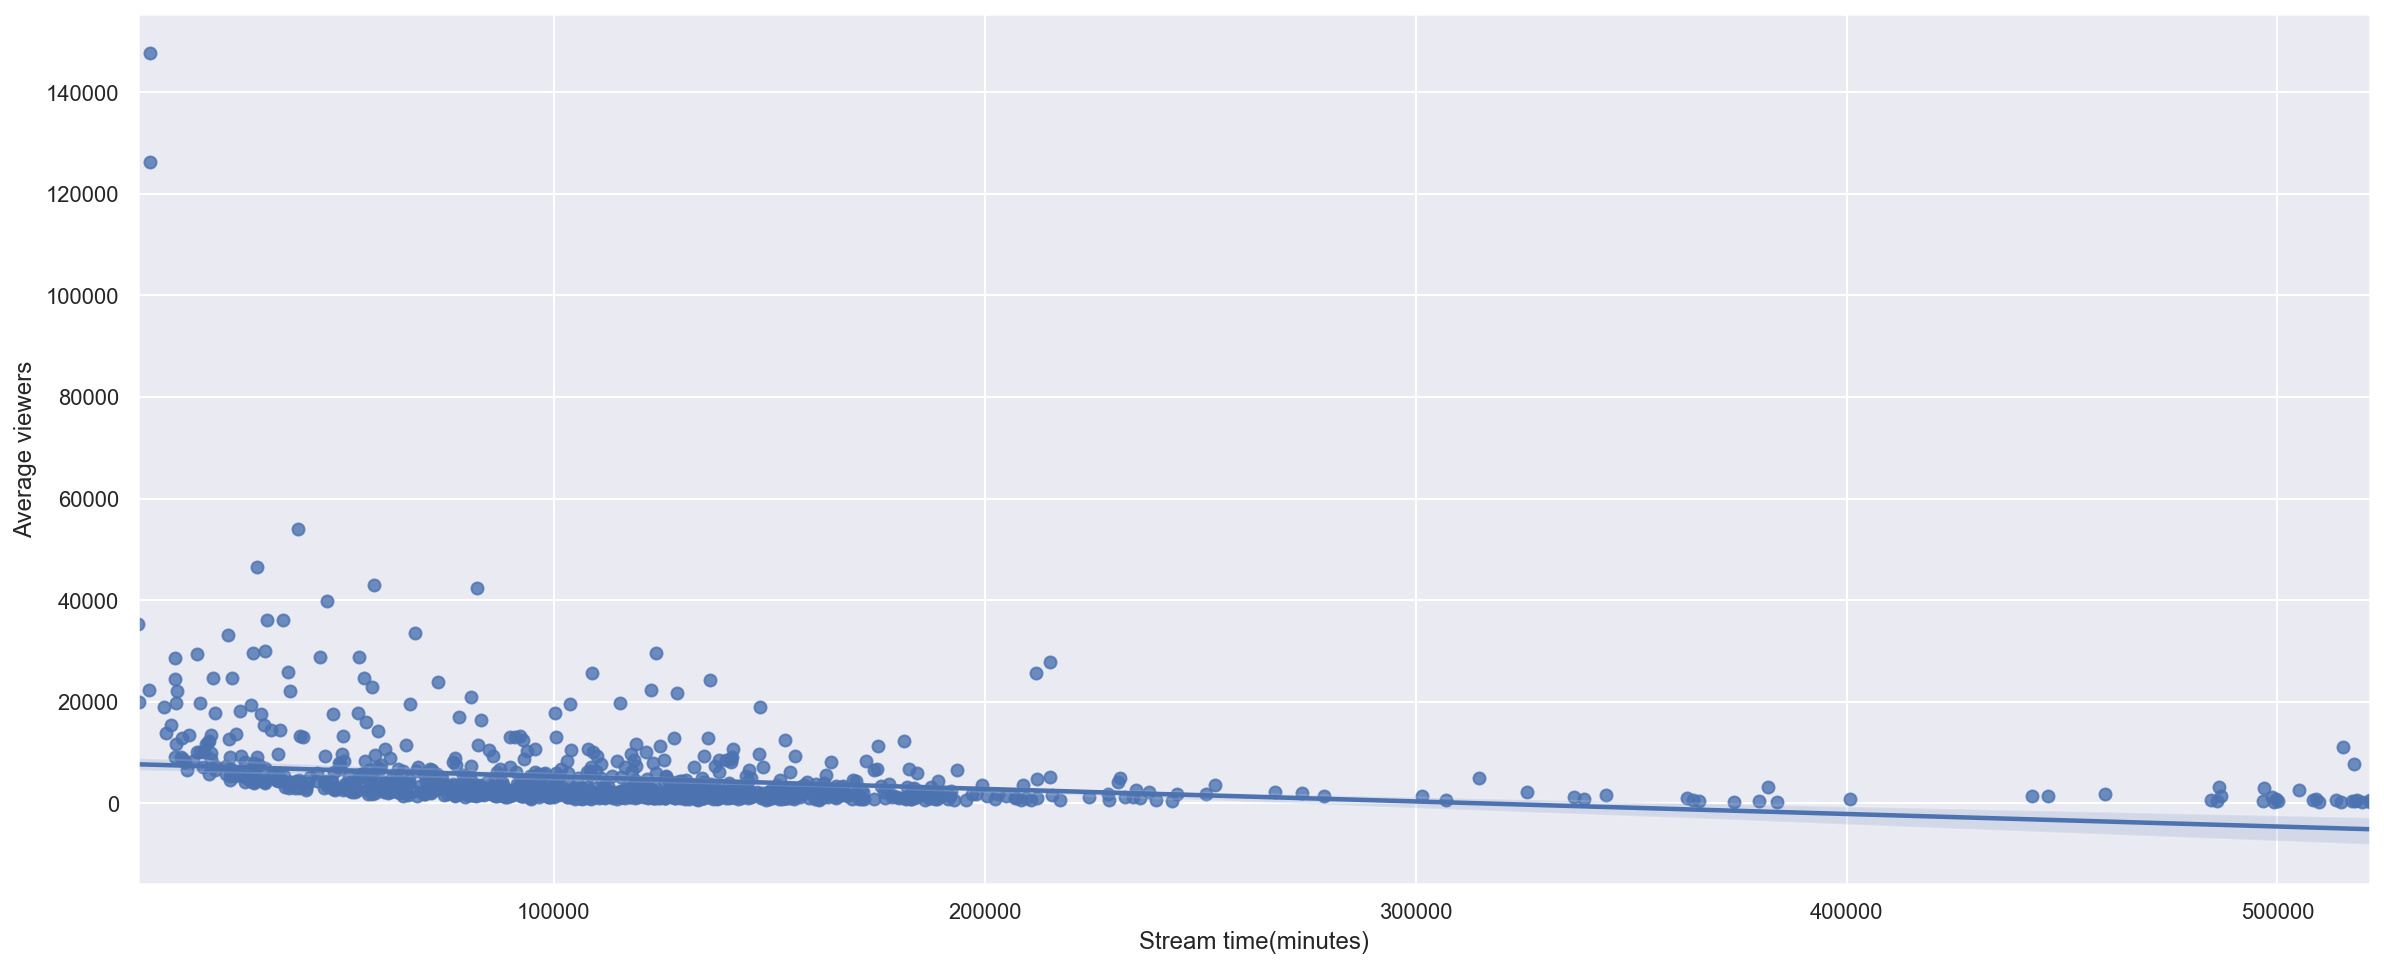

In [14]:
plt.figure(figsize=(20,8))
sns.regplot(x='Stream time(minutes)', y='Average viewers', data=twitch);

In [15]:
twitch['Average viewers'].sort_values(ascending=False)

81     147643
109    126232
14      53986
41      46459
13      42948
        ...  
758       314
746       313
828       297
890       271
992       235
Name: Average viewers, Length: 1000, dtype: int64

In [16]:
twitch.iloc[81], twitch.iloc[109]

(Channel                    dota2ti
 Watch time(Minutes)     1017577605
 Stream time(minutes)          6315
 Peak viewers                483530
 Average viewers             147643
 Followers                   663297
 Followers gained            121422
 Views gained              16228039
 Partnered                        1
 Mature                           0
 Language                   English
 Date                          2931
 English                          1
 Desc                      original
 Name: 81, dtype: object,
 Channel                 dota2ti_ru
 Watch time(Minutes)      812538090
 Stream time(minutes)          6195
 Peak viewers                457060
 Average viewers             126232
 Followers                   541644
 Followers gained            108438
 Views gained              12068376
 Partnered                        1
 Mature                           0
 Language                   Russian
 Date                          2931
 English                          0
 D

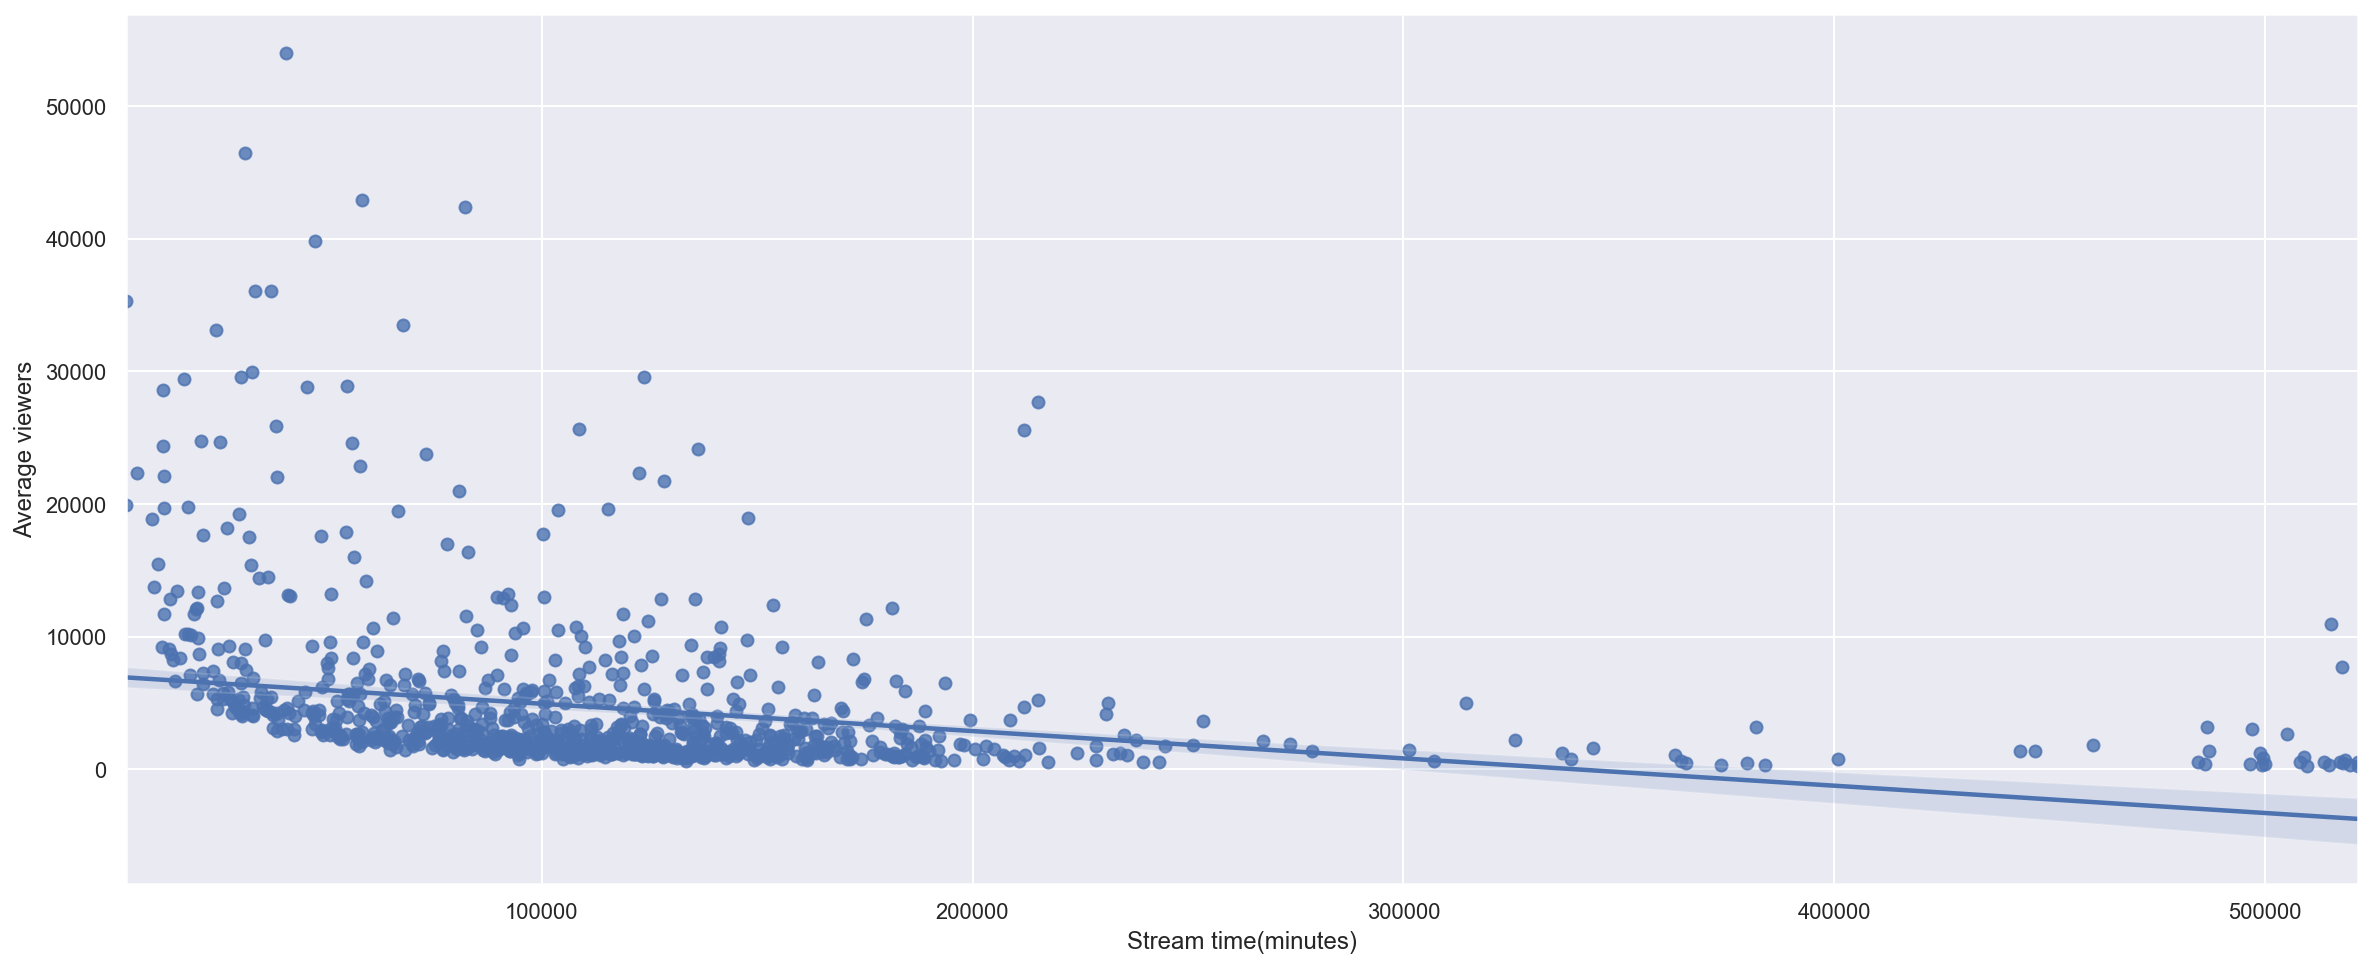

In [17]:
plt.figure(figsize=(20,8))
sns.regplot(x='Stream time(minutes)', y='Average viewers', data=twitch.drop(index=[81, 109]));

In [18]:
corr_matrix = twitch.corr()
corr_matrix

,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Date,English
Watch time(Minutes),1.000000,0.150588,0.582797,0.476165,0.620234,0.514648,0.529862,0.038258,-0.043197,0.037790,0.094492
Stream time(minutes),0.150588,1.000000,-0.119540,-0.249248,-0.091299,-0.158165,0.064370,-0.007073,0.044978,-0.019371,0.045116
Peak viewers,0.582797,-0.119540,1.000000,0.682637,0.532529,0.470415,0.298063,0.028112,-0.082750,0.019987,0.073642
Average viewers,0.476165,-0.249248,0.682637,1.000000,0.428303,0.420097,0.250349,-0.008983,-0.081648,0.002039,0.038105
Followers,0.620234,-0.091299,0.532529,0.428303,1.000000,0.715618,0.276467,0.044418,-0.088521,0.122110,0.163707
Followers gained,0.514648,-0.158165,0.470415,0.420097,0.715618,1.000000,0.244297,0.027465,-0.093001,-0.103026,-0.006353
Views gained,0.529862,0.064370,0.298063,0.250349,0.276467,0.244297,1.000000,-0.035313,-0.088119,-0.025051,0.033871
Partnered,0.038258,-0.007073,0.028112,-0.008983,0.044418,0.027465,-0.035313,1.000000,0.000972,0.138880,0.022780
Mature,-0.043197,0.044978,-0.082750,-0.081648,-0.088521,-0.093001,-0.088119,0.000972,1.000000,0.072779,0.116251
Date,0.037790,-0.019371,0.019987,0.002039,0.122110,-0.103026,-0.025051,0.138880,0.072779,1.000000,0.213450


# Linear Regression

In [19]:
# All Variables

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

X = twitch.drop(columns=['Channel','Language','Followers gained', 'Desc'])
y = twitch['Followers gained']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

estimators = [('scaler', StandardScaler()),
             ('clf', LinearRegression())]

pipe = Pipeline(estimators)

pipe.fit(X_train, y_train)

y_pred_tr = pipe.predict(X_train)
y_pred_test = pipe.predict(X_test)

rmse_tr = (np.sqrt(mean_squared_error(y_train, y_pred_tr)))
rmse_test = (np.sqrt(mean_squared_error(y_test, y_pred_test)))

lin_mae = mean_absolute_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

print('Train rmse : ', rmse_tr)
print('Test rmse : ', rmse_test)
print('Test mae : ', lin_mae)
print('Test r2 : ', r2)

Train rmse :  229207.65080204472
Test rmse :  183302.74023600895
Test mae :  113639.77413584937
Test r2 :  0.4860754096780424


# Drop Outlier

In [21]:
def get_outlier(df=None, column=None, weight=1.5):
    quantile_25 = np.percentile(df[column].values, 25)
    quantile_75 = np.percentile(df[column].values, 75)
    
    iqr = quantile_75 - quantile_25
    iqr_weight = iqr * weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight
    
    outlier_index = df[column][(df[column] < lowest_val) | (df[column] > highest_val)].index
    
    return outlier_index

In [22]:
outlier_index = get_outlier(df=twitch, column='Peak viewers', weight=1.5)
twitch_outlier = twitch.drop(outlier_index, axis=0)
twitch_outlier['Desc'] = 'Peak viewers outlier'
twitch_outlier.shape

(887, 14)

In [23]:
outlier_index = get_outlier(df=twitch, column='Followers gained', weight=1.5)
twitch_outlier_2 = twitch.drop(outlier_index, axis=0)
twitch_outlier_2['Desc'] = 'Followers gained outlier'
twitch_outlier_2.shape

(910, 14)

In [24]:
outlier_index = get_outlier(df=twitch, column='Stream time(minutes)', weight=1.5)
twitch_outlier_3 = twitch.drop(outlier_index, axis=0)
twitch_outlier_3['Desc'] = 'Stream time(minutes) outlier'
twitch_outlier_3.shape

(952, 14)

In [25]:
outlier_index = get_outlier(df=twitch, column='Average viewers', weight=1.5)
twitch_outlier_4 = twitch.drop(outlier_index, axis=0)
twitch_outlier_4['Desc'] = 'Average viewers outlier'
twitch_outlier_4.shape

(900, 14)

In [26]:
outlier_index_1 = get_outlier(df=twitch, column='Peak viewers', weight=1.5)
outlier_index_2 = get_outlier(df=twitch, column='Average viewers', weight=1.5)
outlier_index_3 = list(set(list(outlier_index_2)+list(outlier_index_1)))
twitch_outlier_5 = twitch.drop(outlier_index_3, axis=0)
twitch_outlier_5['Desc'] = 'Average viewers & Peak viewers outlier'
twitch_outlier_5.shape

(850, 14)

# Drop 24hr Channels

In [27]:
twitch_str_time = twitch.sort_values(by = "Stream time(minutes)", ascending=False)
twitch_str_time.reset_index(inplace=True, drop=True)
twitch_str_time['Desc'] = '24hr channels'
twitch_str_time.head()

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language,Date,English,Desc
0,RiffTrax,293583075,521445,24765,562,79099,17200,3313465,1,0,English,4030.0,1,24hr channels
1,RelaxBeats,123273930,521430,2830,235,166162,29595,1094850,1,0,English,1230.0,1,24hr channels
2,Monstercat,163589370,519675,14261,313,788684,22331,4084222,1,0,English,3151.0,1,24hr channels
3,RocketBeansTV,360858030,518415,5223,696,416018,27024,5973152,1,0,German,2573.0,0,24hr channels
4,SaltyTeemo,247613265,517980,1803,476,173196,36103,2117741,0,0,English,2498.0,1,24hr channels


In [28]:
index = [x for x in list(range(30)) if x not in [7,11,13,15,17,21,27,28]]
twitch_cln = twitch_str_time.drop(index=index)
twitch_cln = twitch_cln.sort_values(by="Watch time(Minutes)", ascending=False)

# Function

In [94]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

df_2 = []

def lin_regr(data, target, drop_cols=[[]]):

    df = []

    for column in drop_cols:
        X = data.drop(columns = ['Channel','Language','Desc'] + column + [target])
        y = data[target]

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
        
        clf_list = [LinearRegression(), ElasticNet(alpha=0.1, l1_ratio=0.5), LinearSVR(epsilon=1.5),
                   SVR(kernel='poly', degree=2, C=100, epsilon=0.1)]
        
        for clf in clf_list:
        
            estimators = [('scaler', StandardScaler()),
                         ('clf', clf)]

            pipe = Pipeline(estimators)

            pipe.fit(X_train, y_train)

            y_pred_tr = pipe.predict(X_train)
            y_pred_test = pipe.predict(X_test)

#             rmse_tr = (np.sqrt(mean_squared_error(y_train, y_pred_tr)))
            rmse_test = (np.sqrt(mean_squared_error(y_test, y_pred_test)))
            lin_mae = mean_absolute_error(y_test, y_pred_test)
            r2 = r2_score(y_test, y_pred_test)
            mape = np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100

            df.append({'Dataset' : data.iloc[0]['Desc'], 'Drop Columns' : ', '.join(column),'clf' : clf, 
                       'RMSE' : int(round(rmse_test)), 
                       'MAE' : int(round(lin_mae)), 'MAPE' : int(round(mape)), 'R2_Score' : round(r2, 2)})
    df_2.extend(df)
    df = pd.DataFrame(df)
    return df

# Test Models

In [95]:
# 1. raw dataset

In [96]:
columns = [[], ['Date'], ['English']]

lin_regr(twitch, 'Average viewers', columns)

,Dataset,Drop Columns,clf,RMSE,MAE,MAPE,R2_Score
0,original,,LinearRegression(),3673,2152,108,0.51
1,original,,ElasticNet(alpha=0.1),3544,2099,105,0.54
2,original,,LinearSVR(epsilon=0.1),6232,3455,64,-0.41
3,original,,"SVR(C=100, degree=2, kernel='poly')",4639,2410,64,0.22
4,original,Date,LinearRegression(),3659,2156,108,0.51
5,original,Date,ElasticNet(alpha=0.1),3534,2102,104,0.55
6,original,Date,LinearSVR(epsilon=0.1),6233,3455,64,-0.41
7,original,Date,"SVR(C=100, degree=2, kernel='poly')",4667,2416,65,0.21
8,original,English,LinearRegression(),3672,2151,108,0.51
9,original,English,ElasticNet(alpha=0.1),3542,2099,104,0.54


In [97]:
# 2. drop 24hour channels dataset

In [98]:
columns = [[], ['Date'], ['English']]

lin_regr(twitch_cln, 'Average viewers', columns)

,Dataset,Drop Columns,clf,RMSE,MAE,MAPE,R2_Score
0,24hr channels,,LinearRegression(),4864,2233,105,0.11
1,24hr channels,,ElasticNet(alpha=0.1),4459,2101,99,0.25
2,24hr channels,,LinearSVR(epsilon=0.1),6105,3348,64,-0.40
3,24hr channels,,"SVR(C=100, degree=2, kernel='poly')",9055,2767,68,-2.09
4,24hr channels,Date,LinearRegression(),4855,2224,104,0.11
5,24hr channels,Date,ElasticNet(alpha=0.1),4452,2092,98,0.25
6,24hr channels,Date,LinearSVR(epsilon=0.1),6106,3349,64,-0.40
7,24hr channels,Date,"SVR(C=100, degree=2, kernel='poly')",9167,2789,69,-2.17
8,24hr channels,English,LinearRegression(),4860,2235,106,0.11
9,24hr channels,English,ElasticNet(alpha=0.1),4458,2102,99,0.25


In [99]:
# drop peak viewers outlier

In [100]:
columns = [[], ['Date'], ['English']]

lin_regr(twitch_outlier, 'Average viewers', columns)

,Dataset,Drop Columns,clf,RMSE,MAE,MAPE,R2_Score
0,Peak viewers outlier,,LinearRegression(),1801,1120,61,0.57
1,Peak viewers outlier,,ElasticNet(alpha=0.1),1783,1111,58,0.58
2,Peak viewers outlier,,LinearSVR(epsilon=0.1),3648,2439,65,-0.75
3,Peak viewers outlier,,"SVR(C=100, degree=2, kernel='poly')",2274,1384,52,0.32
4,Peak viewers outlier,Date,LinearRegression(),1803,1121,61,0.57
5,Peak viewers outlier,Date,ElasticNet(alpha=0.1),1785,1112,58,0.58
6,Peak viewers outlier,Date,LinearSVR(epsilon=0.1),3646,2439,65,-0.75
7,Peak viewers outlier,Date,"SVR(C=100, degree=2, kernel='poly')",2243,1379,53,0.34
8,Peak viewers outlier,English,LinearRegression(),1801,1114,60,0.57
9,Peak viewers outlier,English,ElasticNet(alpha=0.1),1784,1106,57,0.58


In [101]:
# drop follower gained outlier

In [102]:
columns = [[], ['Date'], ['English']]

lin_regr(twitch_outlier_2, 'Average viewers', columns)

,Dataset,Drop Columns,clf,RMSE,MAE,MAPE,R2_Score
0,Followers gained outlier,,LinearRegression(),2346,1453,85,0.58
1,Followers gained outlier,,ElasticNet(alpha=0.1),2230,1380,80,0.62
2,Followers gained outlier,,LinearSVR(epsilon=0.1),4452,2656,65,-0.51
3,Followers gained outlier,,"SVR(C=100, degree=2, kernel='poly')",3129,1670,49,0.25
4,Followers gained outlier,Date,LinearRegression(),2349,1458,86,0.58
5,Followers gained outlier,Date,ElasticNet(alpha=0.1),2233,1383,80,0.62
6,Followers gained outlier,Date,LinearSVR(epsilon=0.1),4451,2657,65,-0.51
7,Followers gained outlier,Date,"SVR(C=100, degree=2, kernel='poly')",3097,1673,50,0.27
8,Followers gained outlier,English,LinearRegression(),2345,1453,85,0.58
9,Followers gained outlier,English,ElasticNet(alpha=0.1),2230,1380,80,0.62


In [103]:
# drop stream time outlier

In [104]:
columns = [[], ['Date'], ['English']]

lin_regr(twitch_outlier_3, 'Average viewers', columns)

,Dataset,Drop Columns,clf,RMSE,MAE,MAPE,R2_Score
0,Stream time(minutes) outlier,,LinearRegression(),4084,2273,73,0.59
1,Stream time(minutes) outlier,,ElasticNet(alpha=0.1),3909,2190,68,0.62
2,Stream time(minutes) outlier,,LinearSVR(epsilon=0.1),7546,4116,67,-0.41
3,Stream time(minutes) outlier,,"SVR(C=100, degree=2, kernel='poly')",5357,2752,58,0.29
4,Stream time(minutes) outlier,Date,LinearRegression(),4085,2273,72,0.59
5,Stream time(minutes) outlier,Date,ElasticNet(alpha=0.1),3910,2190,68,0.62
6,Stream time(minutes) outlier,Date,LinearSVR(epsilon=0.1),7546,4116,67,-0.41
7,Stream time(minutes) outlier,Date,"SVR(C=100, degree=2, kernel='poly')",5391,2745,58,0.28
8,Stream time(minutes) outlier,English,LinearRegression(),4068,2257,72,0.59
9,Stream time(minutes) outlier,English,ElasticNet(alpha=0.1),3895,2175,68,0.62


In [105]:
# drop average viewers outlier (Best score)

In [106]:
columns = [[], ['Date'], ['English']]

lin_regr(twitch_outlier_4, 'Average viewers', columns)

,Dataset,Drop Columns,clf,RMSE,MAE,MAPE,R2_Score
0,Average viewers outlier,,LinearRegression(),1050,745,48,0.71
1,Average viewers outlier,,ElasticNet(alpha=0.1),1065,769,47,0.70
2,Average viewers outlier,,LinearSVR(epsilon=0.1),2815,2087,64,-1.10
3,Average viewers outlier,,"SVR(C=100, degree=2, kernel='poly')",1797,1239,51,0.14
4,Average viewers outlier,Date,LinearRegression(),1050,746,48,0.71
5,Average viewers outlier,Date,ElasticNet(alpha=0.1),1065,769,47,0.70
6,Average viewers outlier,Date,LinearSVR(epsilon=0.1),2813,2086,64,-1.10
7,Average viewers outlier,Date,"SVR(C=100, degree=2, kernel='poly')",1823,1241,52,0.12
8,Average viewers outlier,English,LinearRegression(),1056,744,48,0.70
9,Average viewers outlier,English,ElasticNet(alpha=0.1),1071,766,47,0.70


In [107]:
# drop average viewers & peak viewers outlier

In [108]:
columns = [[], ['Date'], ['English']]

lin_regr(twitch_outlier_5, 'Average viewers', columns)

,Dataset,Drop Columns,clf,RMSE,MAE,MAPE,R2_Score
0,Average viewers & Peak viewers outlier,,LinearRegression(),1148,732,46,0.65
1,Average viewers & Peak viewers outlier,,ElasticNet(alpha=0.1),1140,738,45,0.65
2,Average viewers & Peak viewers outlier,,LinearSVR(epsilon=0.1),2748,2002,63,-1.03
3,Average viewers & Peak viewers outlier,,"SVR(C=100, degree=2, kernel='poly')",1660,1127,53,0.26
4,Average viewers & Peak viewers outlier,Date,LinearRegression(),1151,735,47,0.64
5,Average viewers & Peak viewers outlier,Date,ElasticNet(alpha=0.1),1142,739,45,0.65
6,Average viewers & Peak viewers outlier,Date,LinearSVR(epsilon=0.1),2749,2004,64,-1.03
7,Average viewers & Peak viewers outlier,Date,"SVR(C=100, degree=2, kernel='poly')",1638,1133,56,0.28
8,Average viewers & Peak viewers outlier,English,LinearRegression(),1150,736,47,0.64
9,Average viewers & Peak viewers outlier,English,ElasticNet(alpha=0.1),1143,742,45,0.65


In [109]:
columns = [[], ['Date'], ['English'], ['English', 'Date', 'Mature','Partnered']]

lin_regr(twitch_outlier_5, 'Average viewers', columns)

,Dataset,Drop Columns,clf,RMSE,MAE,MAPE,R2_Score
0,Average viewers & Peak viewers outlier,,LinearRegression(),1148,732,46,0.65
1,Average viewers & Peak viewers outlier,,ElasticNet(alpha=0.1),1140,738,45,0.65
2,Average viewers & Peak viewers outlier,,LinearSVR(epsilon=0.1),2748,2002,64,-1.03
3,Average viewers & Peak viewers outlier,,"SVR(C=100, degree=2, kernel='poly')",1660,1127,53,0.26
4,Average viewers & Peak viewers outlier,Date,LinearRegression(),1151,735,47,0.64
5,Average viewers & Peak viewers outlier,Date,ElasticNet(alpha=0.1),1142,739,45,0.65
6,Average viewers & Peak viewers outlier,Date,LinearSVR(epsilon=0.1),2749,2005,64,-1.03
7,Average viewers & Peak viewers outlier,Date,"SVR(C=100, degree=2, kernel='poly')",1638,1133,56,0.28
8,Average viewers & Peak viewers outlier,English,LinearRegression(),1150,736,47,0.64
9,Average viewers & Peak viewers outlier,English,ElasticNet(alpha=0.1),1143,742,45,0.65


In [110]:
a = pd.DataFrame(df_2)
a.clf = a.clf.astype('str')

In [111]:
a

,Dataset,Drop Columns,clf,RMSE,MAE,MAPE,R2_Score
0,original,,LinearRegression(),3673,2152,108,0.51
1,original,,ElasticNet(alpha=0.1),3544,2099,105,0.54
2,original,,LinearSVR(epsilon=0.1),6232,3455,64,-0.41
3,original,,"SVR(C=100, degree=2, kernel='poly')",4639,2410,64,0.22
4,original,Date,LinearRegression(),3659,2156,108,0.51
...,...,...,...,...,...,...,...
95,Average viewers & Peak viewers outlier,English,"SVR(C=100, degree=2, kernel='poly')",1664,1128,53,0.26
96,Average viewers & Peak viewers outlier,"English, Date, Mature, Partnered",LinearRegression(),1153,745,49,0.64
97,Average viewers & Peak viewers outlier,"English, Date, Mature, Partnered",ElasticNet(alpha=0.1),1144,749,47,0.65
98,Average viewers & Peak viewers outlier,"English, Date, Mature, Partnered",LinearSVR(epsilon=0.1),2749,2004,64,-1.03


In [112]:
a.sort_values(by='RMSE')

,Dataset,Drop Columns,clf,RMSE,MAE,MAPE,R2_Score
60,Average viewers outlier,,LinearRegression(),1050,745,48,0.71
64,Average viewers outlier,Date,LinearRegression(),1050,746,48,0.71
68,Average viewers outlier,English,LinearRegression(),1056,744,48,0.70
65,Average viewers outlier,Date,ElasticNet(alpha=0.1),1065,769,47,0.70
61,Average viewers outlier,,ElasticNet(alpha=0.1),1065,769,47,0.70
...,...,...,...,...,...,...,...
50,Stream time(minutes) outlier,,LinearSVR(epsilon=0.1),7546,4116,67,-0.41
54,Stream time(minutes) outlier,Date,LinearSVR(epsilon=0.1),7546,4116,67,-0.41
58,Stream time(minutes) outlier,English,LinearSVR(epsilon=0.1),7546,4116,67,-0.41
15,24hr channels,,"SVR(C=100, degree=2, kernel='poly')",9055,2767,68,-2.09


In [113]:
a.sort_values(by='MAE')

,Dataset,Drop Columns,clf,RMSE,MAE,MAPE,R2_Score
84,Average viewers & Peak viewers outlier,,LinearRegression(),1148,732,46,0.65
72,Average viewers & Peak viewers outlier,,LinearRegression(),1148,732,46,0.65
88,Average viewers & Peak viewers outlier,Date,LinearRegression(),1151,735,47,0.64
76,Average viewers & Peak viewers outlier,Date,LinearRegression(),1151,735,47,0.64
80,Average viewers & Peak viewers outlier,English,LinearRegression(),1150,736,47,0.64
...,...,...,...,...,...,...,...
6,original,Date,LinearSVR(epsilon=0.1),6233,3455,64,-0.41
2,original,,LinearSVR(epsilon=0.1),6232,3455,64,-0.41
50,Stream time(minutes) outlier,,LinearSVR(epsilon=0.1),7546,4116,67,-0.41
54,Stream time(minutes) outlier,Date,LinearSVR(epsilon=0.1),7546,4116,67,-0.41


In [114]:
a.sort_values(by='R2_Score', ascending=False)

,Dataset,Drop Columns,clf,RMSE,MAE,MAPE,R2_Score
64,Average viewers outlier,Date,LinearRegression(),1050,746,48,0.71
60,Average viewers outlier,,LinearRegression(),1050,745,48,0.71
61,Average viewers outlier,,ElasticNet(alpha=0.1),1065,769,47,0.70
65,Average viewers outlier,Date,ElasticNet(alpha=0.1),1065,769,47,0.70
68,Average viewers outlier,English,LinearRegression(),1056,744,48,0.70
...,...,...,...,...,...,...,...
62,Average viewers outlier,,LinearSVR(epsilon=0.1),2815,2087,64,-1.10
66,Average viewers outlier,Date,LinearSVR(epsilon=0.1),2813,2086,64,-1.10
70,Average viewers outlier,English,LinearSVR(epsilon=0.1),2814,2087,64,-1.10
15,24hr channels,,"SVR(C=100, degree=2, kernel='poly')",9055,2767,68,-2.09


In [115]:
df = pd.DataFrame()
df = pd.concat([lin_regr(twitch_outlier_4, 'Average viewers', columns), lin_regr(twitch_outlier_5, 'Average viewers', columns)])
df['clf'] = df['clf'].astype('str')
df = df[df['clf'] != 'LinearSVR(epsilon=1.5)']
df

,Dataset,Drop Columns,clf,RMSE,MAE,MAPE,R2_Score
0,Average viewers outlier,,LinearRegression(),1050,745,48,0.71
1,Average viewers outlier,,ElasticNet(alpha=0.1),1065,769,47,0.70
2,Average viewers outlier,,LinearSVR(epsilon=0.1),2815,2087,64,-1.10
3,Average viewers outlier,,"SVR(C=100, degree=2, kernel='poly')",1797,1239,51,0.14
4,Average viewers outlier,Date,LinearRegression(),1050,746,48,0.71
5,Average viewers outlier,Date,ElasticNet(alpha=0.1),1065,769,47,0.70
6,Average viewers outlier,Date,LinearSVR(epsilon=0.1),2812,2086,64,-1.09
7,Average viewers outlier,Date,"SVR(C=100, degree=2, kernel='poly')",1823,1241,52,0.12
8,Average viewers outlier,English,LinearRegression(),1056,744,48,0.70
9,Average viewers outlier,English,ElasticNet(alpha=0.1),1071,766,47,0.70


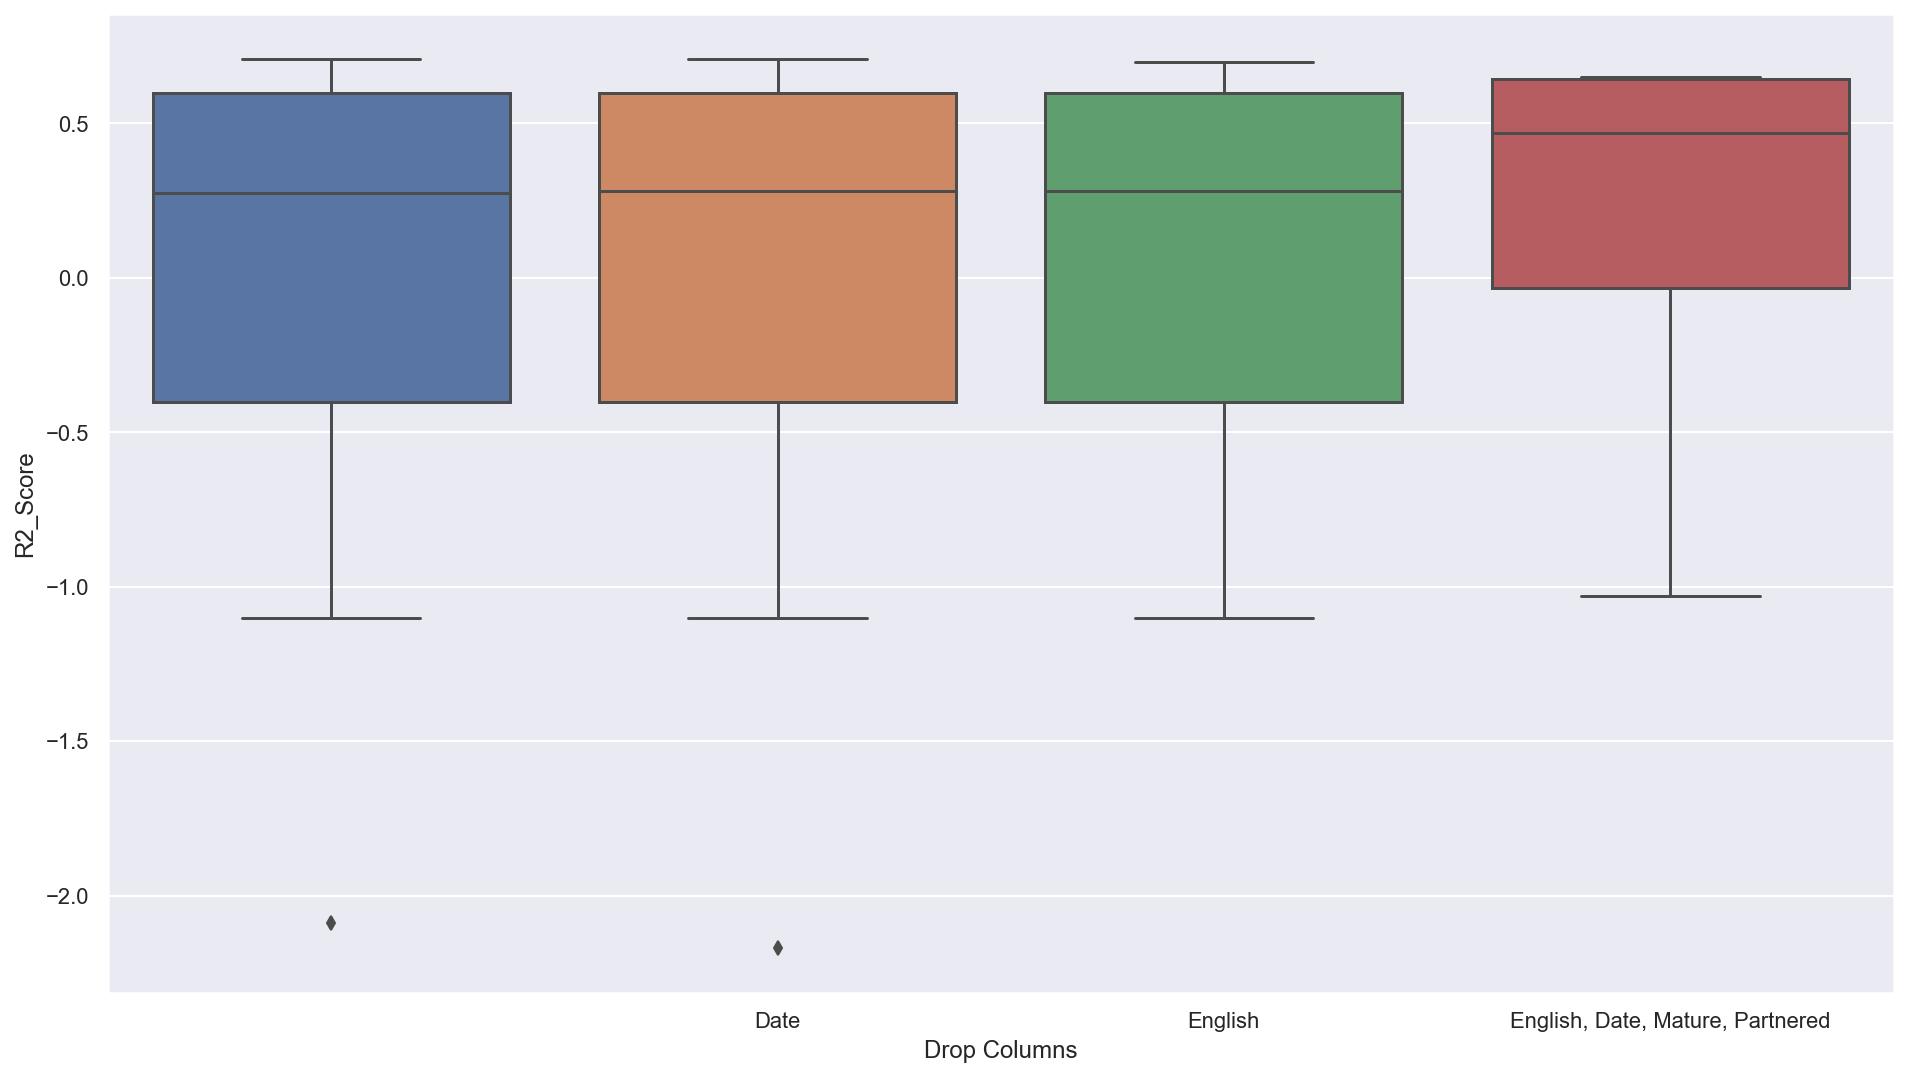

In [116]:
plt.figure(figsize=(16,9))
sns.boxplot(x='Drop Columns',y='R2_Score',data=a);

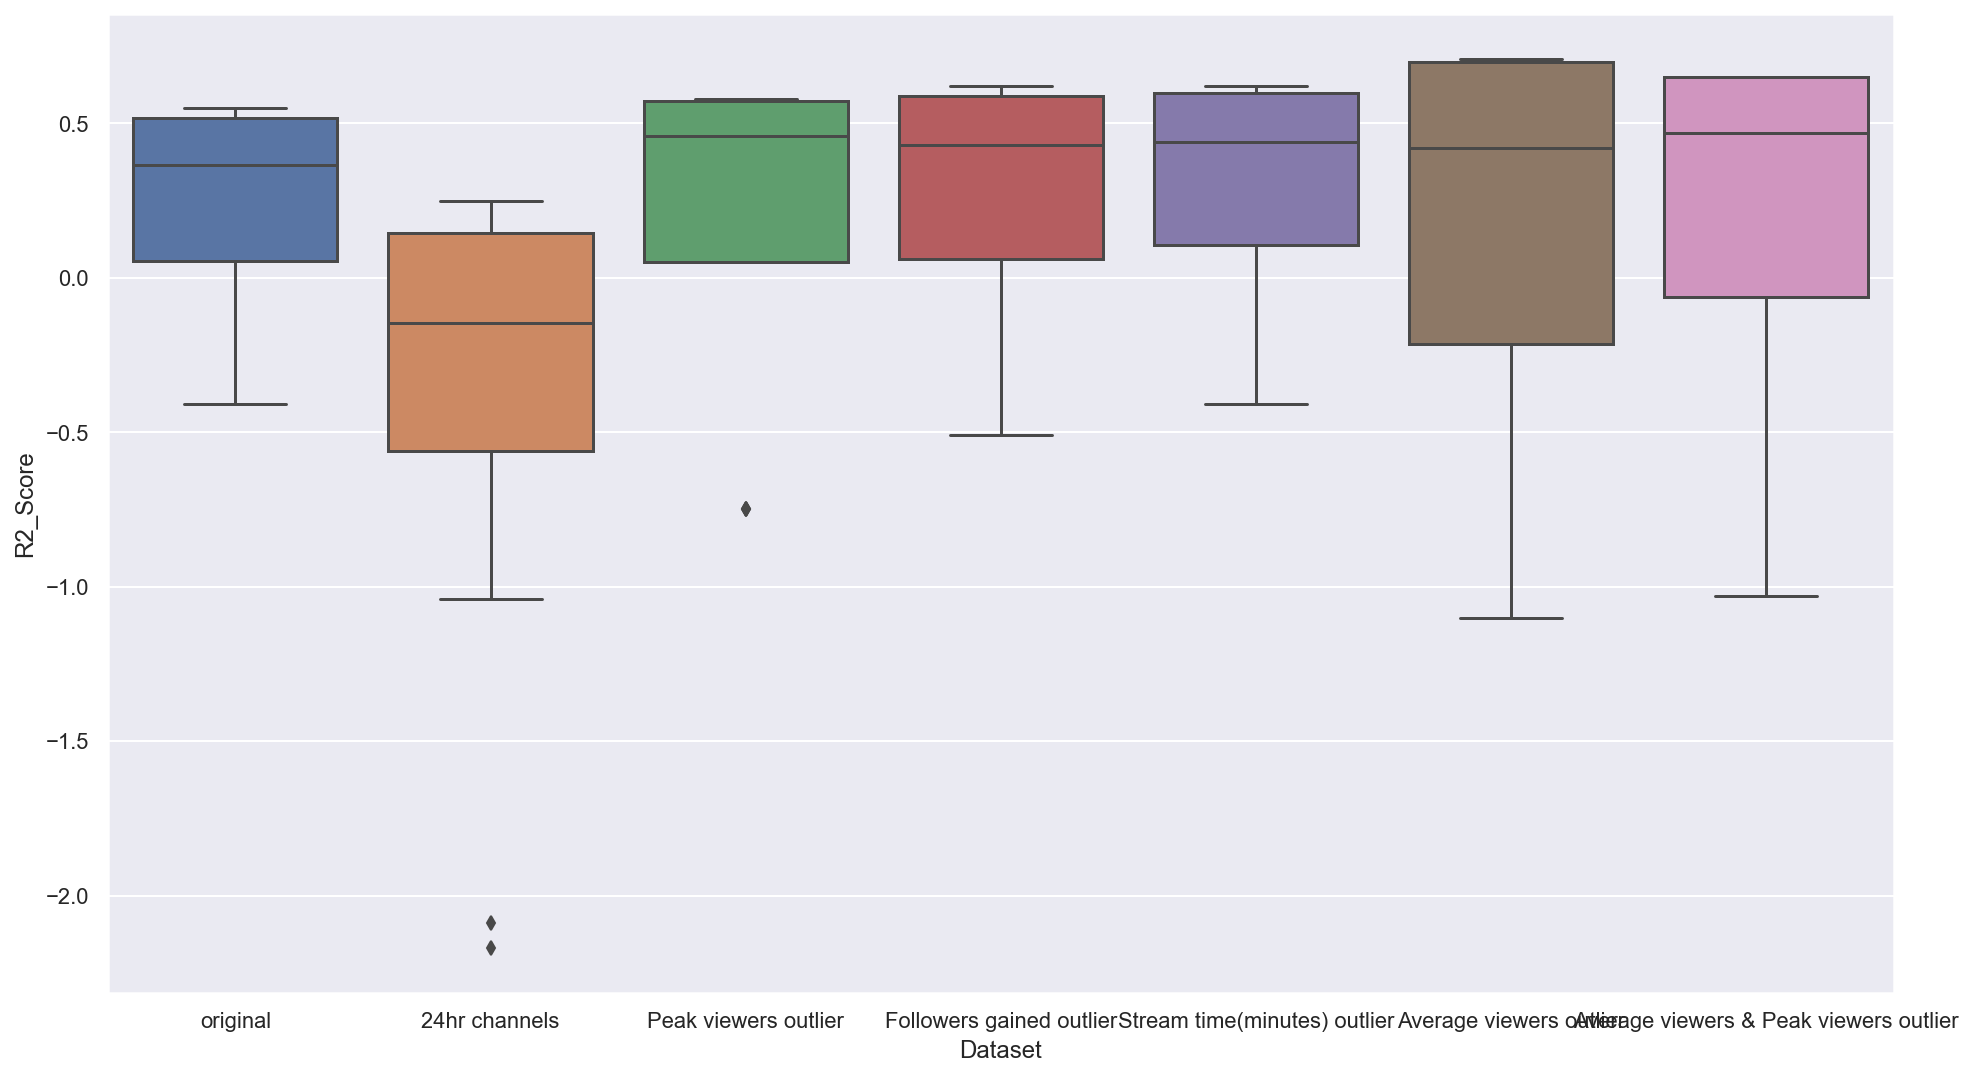

In [117]:
plt.figure(figsize=(16,9))
sns.boxplot(x='Dataset',y='R2_Score',data=a);

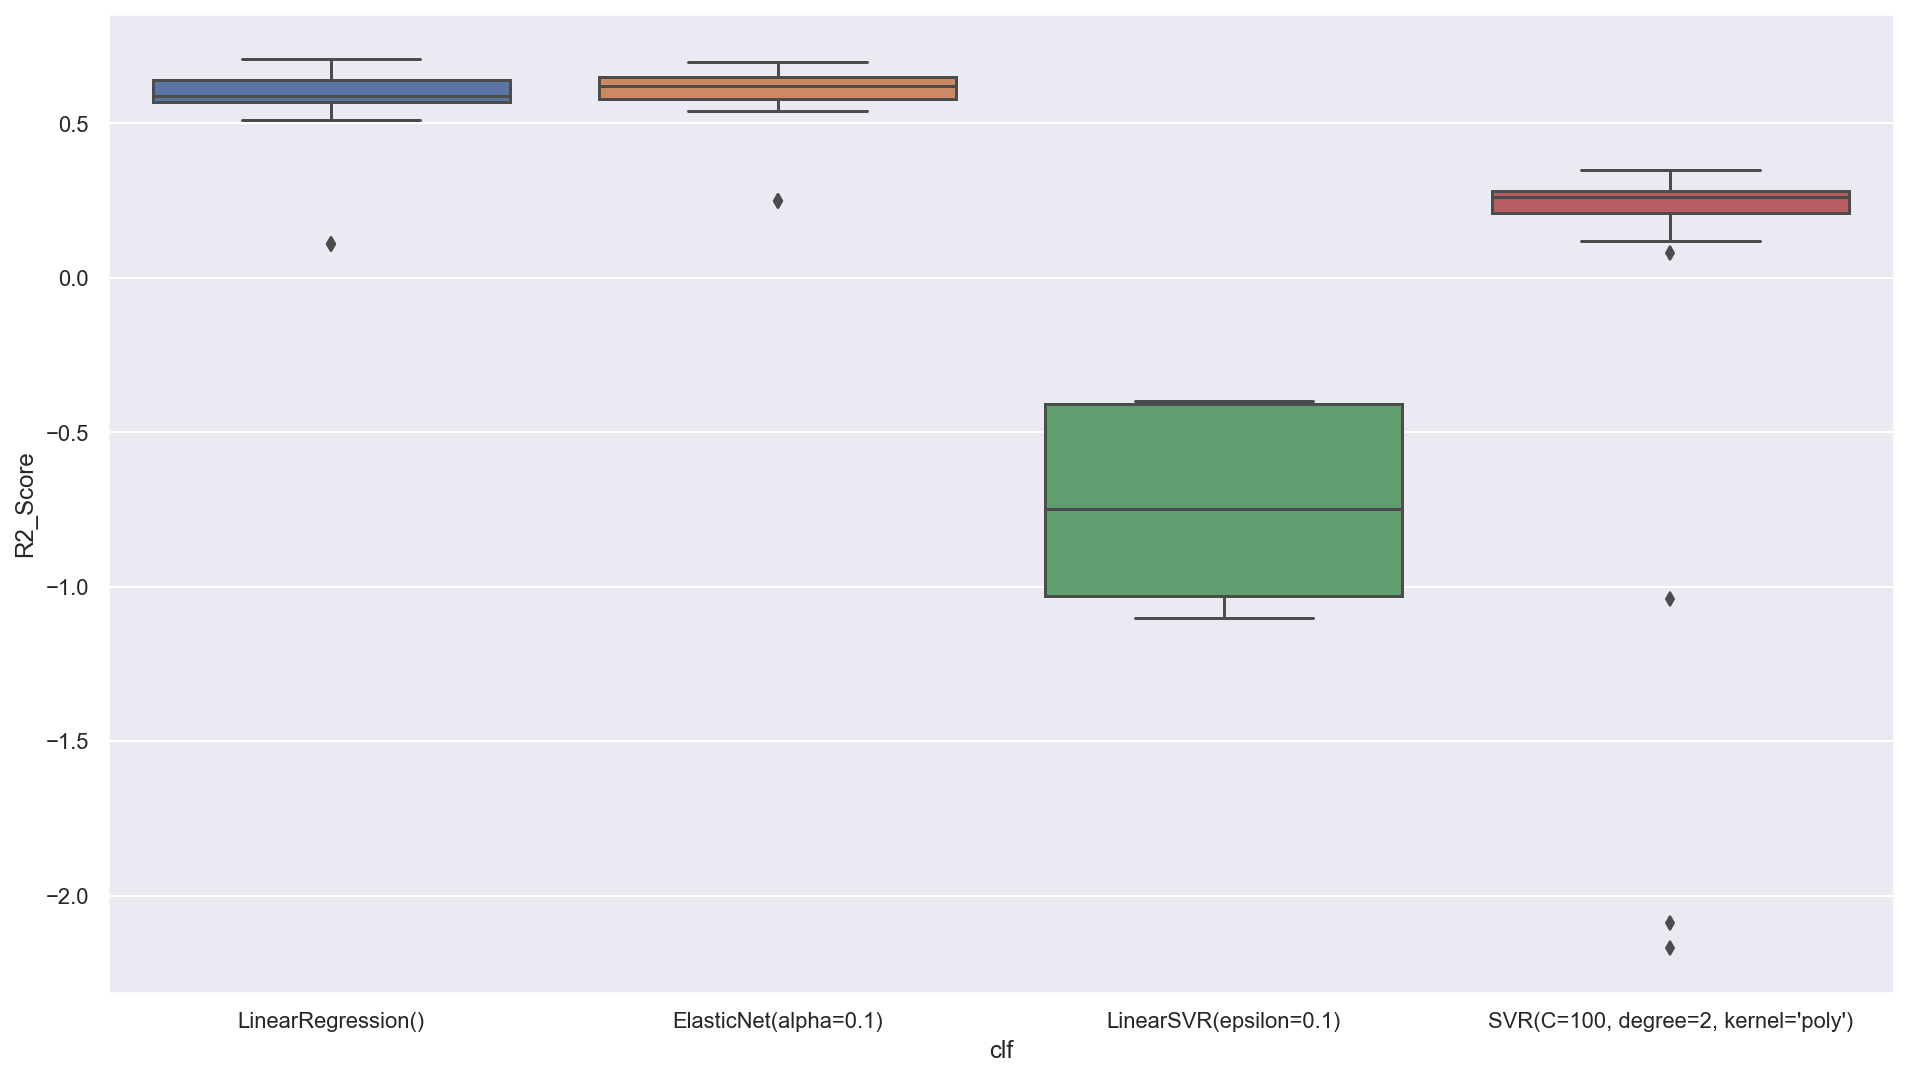

In [118]:
plt.figure(figsize=(16,9))
sns.boxplot(x='clf',y='R2_Score',data=a);